In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.ticker as mticker

In [4]:
# Seting parameters
lambda_B = 2.0  # Rate parameter for Bayesienine
mu_S = 4.0      # Mean for Statistiene
sigma_S = 0.8   # Standard deviation for Statistiene
P_B = 0.1       # Prior probability of Bayesienine (chosen small since p(B) << p(S))
P_S = 0.9       # Prior probability of Statistiene

# Creating range of threshold values
g_T_values = np.linspace(0, 8, 1000)

# Calculating misclassification probabilities
p_B_S = np.exp(-lambda_B * g_T_values)  # Bayesienine misclassified as Statistiene
p_S_B = norm.cdf((g_T_values - mu_S) / sigma_S)  # Statistiene misclassified as Bayesienine

# Calculating total error
total_error = P_B * p_B_S + P_S * p_S_B

# Finding minimum error point
min_idx = np.argmin(total_error)
optimal_g_T = g_T_values[min_idx]
min_error = total_error[min_idx]

In [7]:
# Calculating the theoretical optimal threshold
def objective_function(g):
    left = lambda_B * np.exp(-lambda_B * g)
    right = (P_S / P_B) * (1 / (sigma_S * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((g - mu_S) / sigma_S)**2)
    return np.abs(left - right)

from scipy.optimize import minimize_scalar
result = minimize_scalar(objective_function, bounds=(0, 10), method='bounded')
theoretical_g_T = result.x

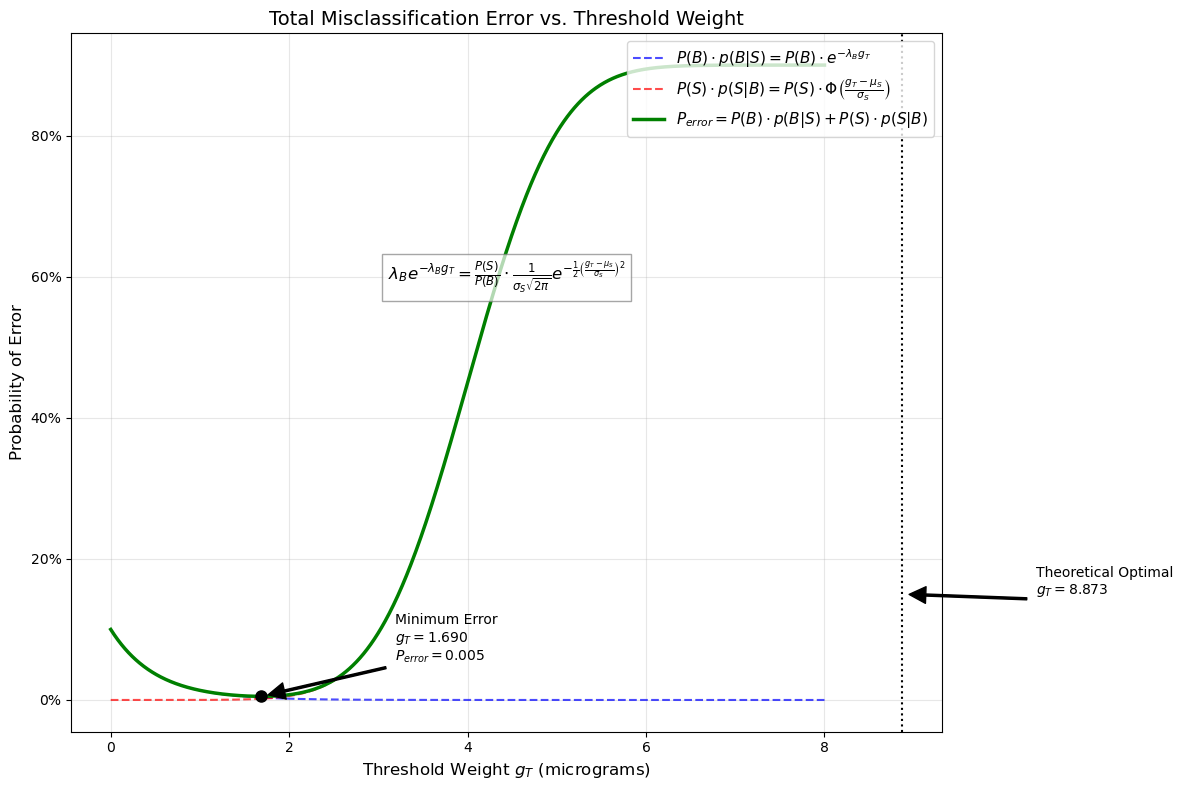

In [8]:
# Creating the plot
plt.figure(figsize=(12, 8))

# Ploting individual and total errors
plt.plot(g_T_values, P_B * p_B_S, 'b--', linewidth=1.5, alpha=0.7, 
         label=r'$P(B) \cdot p(B|S) = P(B) \cdot e^{-\lambda_B g_T}$')
plt.plot(g_T_values, P_S * p_S_B, 'r--', linewidth=1.5, alpha=0.7,
         label=r'$P(S) \cdot p(S|B) = P(S) \cdot \Phi\left(\frac{g_T - \mu_S}{\sigma_S}\right)$')
plt.plot(g_T_values, total_error, 'g-', linewidth=2.5,
         label=r'$P_{error} = P(B) \cdot p(B|S) + P(S) \cdot p(S|B)$')

# Marking the minimum point
plt.plot(optimal_g_T, min_error, 'ko', markersize=8)
plt.annotate(f'Minimum Error\n$g_T = {optimal_g_T:.3f}$\n$P_{{error}} = {min_error:.3f}$', 
             xy=(optimal_g_T, min_error),
             xytext=(optimal_g_T + 1.5, min_error + 0.05),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             fontsize=10)

# Marking the theoretical optimal threshold
plt.axvline(x=theoretical_g_T, color='k', linestyle=':', linewidth=1.5)
plt.annotate(f'Theoretical Optimal\n$g_T = {theoretical_g_T:.3f}$', 
             xy=(theoretical_g_T, 0.15),
             xytext=(theoretical_g_T + 1.5, 0.15),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             fontsize=10)

# Equation display
equation_text = r'$\lambda_B e^{-\lambda_B g_T} = \frac{P(S)}{P(B)} \cdot \frac{1}{\sigma_S\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{g_T-\mu_S}{\sigma_S}\right)^2}$'
plt.text(0.5, 0.65, equation_text, fontsize=12, horizontalalignment='center', 
         verticalalignment='center', transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

# Adding labels and title
plt.xlabel('Threshold Weight $g_T$ (micrograms)', fontsize=12)
plt.ylabel('Probability of Error', fontsize=12)
plt.title('Total Misclassification Error vs. Threshold Weight', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11, loc='upper right')

# Formating y-axis as percentages
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

plt.tight_layout()
plt.savefig('total_error.png', dpi=300)
plt.show()